In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6) 
data_path = "./"
from subprocess import check_output
print(check_output(["ls", data_path]).decode("utf8"))

Populating the interactive namespace from numpy and matplotlib
Project.ipynb
README.md
Untitled.ipynb
imagesSwitzerland (1).txt
imagesSwitzerland.csv
imagesSwitzerland.txt



In [3]:
def loadDataToDF():
    text=pd.read_csv("imagesSwitzerland.csv")
    x=text[text.columns.values[0]].dropna().tolist()
    ids=[]
    owners=[]
    titles=[]
    originals=[]
    originalf=[]
    height=[]
    width=[]
    datetaken=[]
    dateupload=[]
    tags=[]
    license=[]
    lat=[]
    long=[]
    acc=[]
    views=[]
    inter=[]
    df=pd.DataFrame()
    for index in range(0,len(x),16):
        pid=x[index]
        ids.extend([pid[pid.find("<item>")+13:pid.find("</photo>")]])
        
        own=x[index+1]
        owners.extend([own[own.find("<owner>")+7:own.find("</owner>")]])
        titl=x[index+2]
        titles.extend([titl[titl.find("<title>")+7:titl.find("</title>")]])
        ori=x[index+3]
        originals.extend([ori[ori.find("<originalsecret>")+16:ori.find("</originalsecret>")]])
        oriF=x[index+4]
        originalf.extend([oriF[oriF.find("<originalformat>")+16:oriF.find("</originalformat>")]])
        
        he=x[index+5]
        height.extend([he[he.find("<o_height>")+10:he.find("</o_height>")]])
        
        we=x[index+6]
        width.extend([we[we.find("<o_width>")+9:we.find("</o_width>")]])
        
        dt=x[index+7]
        datetaken.extend([dt[dt.find("<datetaken>")+11:dt.find("</datetaken>")]])
        
        du=x[index+8]
        dateupload.extend([du[du.find("<dateupload>")+12:du.find("</dateupload>")]])
        
        #problem in preprocessed file. Sometimes tags are in <item><photo> elements
        tg=x[index+9]
        if "<item>" in tg: tags.extend([tg[tg.find("<item>")+13:tg.find("</photo>")]])
        else: tags.extend([tg[tg.find("<tags>")+6:tg.find("</tags>")]])
        
        li=x[index+10]
        license.extend([li[li.find("<license>")+9:li.find("</license>")]])
        
        la=x[index+11]
        lat.extend([la[la.find("<latitude>")+10:la.find("</latitude>")]])
        
        lo=x[index+12]
        long.extend([lo[lo.find("<longitude>")+11:lo.find("</longitude>")]])
        
        accuracy=x[index+13]
        acc.extend([accuracy[accuracy.find("<accuracy>")+10:accuracy.find("</accuracy>")]])
        
        vw=x[index+14]
        views.extend([vw[vw.find("<views>")+7:vw.find("</views>")]])
        
        inte=x[index+15]
        inter.extend([inte[inte.find("<interestingness>")+17:inte.find("</interestingness>")]])
        
    df["photo_id"]=ids
    df["owner"]=owners
    df["title"]=titles
    df["originalsecret"]=originals
    df["originalformat"]=originalf
    df["o_height"]=height
    df["o_width"]=width
    df["datetaken"]=datetaken
    df["dateupload"]=dateupload
    df["tags"]=tags
    df["license"]=license
    df["latitude"]=lat
    df["longitude"]=long
    df["accuracy"]=acc
    df["views"]=views
    df["interestingness"]=inter    
    return df


In [4]:
flickers = loadDataToDF()

/Users/Sam/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [11]:
flickers.sample(5)

,photo_id,owner,title,originalsecret,originalformat,o_height,o_width,datetaken,dateupload,tags,license,latitude,longitude,accuracy,views,interestingness
35209,1053737742 ced9c9c471 1375,84554176@N00,2007-07-28,861e8f8a18,jpg,1280,960,2007-07-28 17:57:27,1186601165,schweiz switzerland suisse leman vevey laclem...,4,46.460846,6.841220,14,98,45 out of 252
23023,582356033 d26e5cdc6b 1157,48458761@N00,...,3b0c4080dc,jpg,1520,1521,2007-06-07 15:25:20,1182458869,schweiz switzerland suisse streetphotography 1...,0,47.388286,8.528641,16,3,76 out of 244
14031,496199726 799fc96753 224,7889561@N02,Light within,null,null,null,null,2006-06-29 13:52:19,1179066714,blackandwhite abandoned switzerland decay urb...,0,46.519968,8.675588,16,709,90 out of 234
29985,864508087 432b83a25a 1326,33825141@N00,Aletsch glacier,870c9f7d42,jpg,null,null,2007-07-21 18:40:00,1185033600,blue sky panorama clouds switzerland rocks gl...,0,46.441819,8.107738,12,4144,3 out of 267
9404,457052092 eda03f0368 250,31847200@N00,Alps,034b37bda3,jpg,null,null,2007-04-06 13:11:56,1176419967,snow mountains alps switzerland 2007 snowcave,0,46.547490,7.983080,16,28,66 out of 262


In [9]:
flickers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51834 entries, 0 to 51833
Data columns (total 16 columns):
photo_id           51834 non-null object
owner              51834 non-null object
title              51834 non-null object
originalsecret     51834 non-null object
originalformat     51834 non-null object
o_height           51834 non-null object
o_width            51834 non-null object
datetaken          51834 non-null object
dateupload         51834 non-null object
tags               51834 non-null object
license            51834 non-null object
latitude           51834 non-null object
longitude          51834 non-null object
accuracy           51834 non-null object
views              51834 non-null object
interestingness    51834 non-null object
dtypes: object(16)
memory usage: 6.3+ MB


In [12]:
flickers = flickers[['owner', 'title', 'datetaken', 'tags', 'latitude', 'longitude', 'accuracy', 'views', 'interestingness']]

In [14]:
flickers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51834 entries, 0 to 51833
Data columns (total 9 columns):
owner              51834 non-null object
title              51834 non-null object
datetaken          51834 non-null object
tags               51834 non-null object
latitude           51834 non-null object
longitude          51834 non-null object
accuracy           51834 non-null object
views              51834 non-null object
interestingness    51834 non-null object
dtypes: object(9)
memory usage: 3.6+ MB


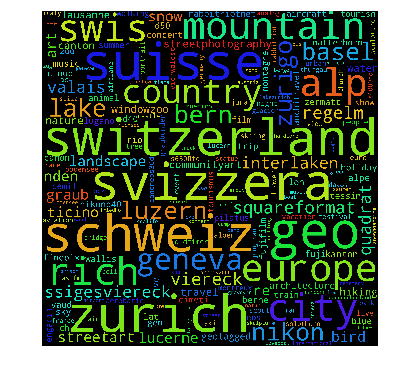

In [28]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from os import path
from PIL import Image


tags = ' '.join(flickers.tags.values)
#tags = preprocessing(' '.join(flickers.tags.values))
wc = WordCloud(width=10000, height=10000, stopwords=STOPWORDS)
wc.generate(tags)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [16]:
flickers.tags.values[:100]

array([' switzerland nikonn80', ' sunset switzerland',
       ' mountain ice sign night switzerland davos rink',
       ' mountain switzerland davos sunsset',
       ' snow alps forest alpes switzerland wallis for?t verbier vallais stchristophe spiritualit? grandcombin valdebagnes',
       'switzerland suisse wallis brig valais brigerbad nonjesuisungachemetieretjedetestelesquesamsplaceadesmeilleuresphotosquemoidanssonstream persojemenfoussamakamettrelesphotosquilveutdumomentkellessontjolies',
       ' snow alps forest alpes switzerland wallis for?t verbier vallais stchristophe spiritualit? grandcombin valdebagnes',
       ' sunset mountain lensbaby switzerland davos',
       ' night switzerland luzern january2007',
       'people girl beauty bar night lava restaurant schweiz switzerland pub suisse swiss au lounge kecko ostschweiz blonde karaoke svizzera rheintal susa 2007 lavabar swissphoto rheintalbild',
       ' lensbaby switzerland best arena davos rink',
       ' ice sign night swi

In [25]:
flickers.latitude.values


array([' 47.050124', ' 47.543221', ' 46.797892', ..., ' 46.563788',
       ' 50.879318', ' 46.317354'], dtype=object)